<a href="https://colab.research.google.com/github/SohamSharangpani/ML/blob/master/Lab/ML_02_13072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exercise 1


### 1.Import dataset store it as dataframe in python: filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [2]:
df = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [3]:
auto = pd.read_csv(df)

In [4]:
type(auto)

pandas.core.frame.DataFrame

### 2.Add column header to dataset


In [5]:
col_names = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
auto = pd.read_csv(df, names=col_names)

### 3.Read the first 5 lines and display

In [7]:
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 4.Are there missing data? Or illegal characters in the dataframe?

Yes, we can see Na values and illegal characters like Question mark (?) in the data set.


### 5.Replace the character “?” with nan

In [8]:
auto.replace("?", np.nan, inplace=True)
auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


### 6.Count missing values in each column and print it with column name

In [9]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
  return mis_val_table_ren_columns

In [10]:
missing_values_table(auto)

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-doors,2,1.0
horsepower,2,1.0
peak-rpm,2,1.0


### 7.Delete price rows that have missing data

In [11]:
auto.dropna(subset = ['price'],inplace = True)

In [12]:
#????

### 8.Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column

In [13]:
auto['normalized-losses'].replace(np.nan,(auto['normalized-losses'].astype('float').mean(axis=0)),inplace = True)

In [14]:
auto['bore'].replace(np.nan,(auto['bore'].astype('float').mean(axis=0)),inplace = True)

In [15]:
auto['stroke'].replace(np.nan,(auto['stroke'].astype('float').mean(axis=0)),inplace = True)

In [16]:
auto['horsepower'].replace(np.nan,(auto['horsepower'].astype('float').mean(axis=0)),inplace = True)

In [17]:
auto['peak-rpm'].replace(np.nan,(auto['peak-rpm'].astype('float').mean(axis=0)),inplace = True)

### 9.Num-of-doors replace missing with most frequent value in the column

In [18]:
auto['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [19]:
auto['num-of-doors'].replace(np.nan,'four',inplace = True)

### 10.Reset the index of dataframe

In [20]:
auto.reset_index(inplace = True)

### 11.Check datatype of columns and convert numeric/quantitative variables to float or int

In [21]:
auto.dtypes

index                  int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
auto[['horsepower']]=auto[['horsepower']].astype('float')

In [23]:
#?????

### 12.Transform city-mpg and highway-mpg into liters/100km using conversion formula:
L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”


In [24]:
auto['city-L/100km'] = 235/auto['city-mpg']
auto['highway-L/100km'] = 235/auto['highway-mpg']

### 13. Normalize columns length, width, height so that their values range from 0 to 1.         
Hint:  Replace original values with original_value/max_value

In [25]:
auto['length'] = auto['length']/auto['length'].max()
auto['width'] = auto['width']/auto['width'].max()
auto['height'] = auto['height']/auto['height'].max()

### 14.Plot the histogram of horsepower to see its distribution

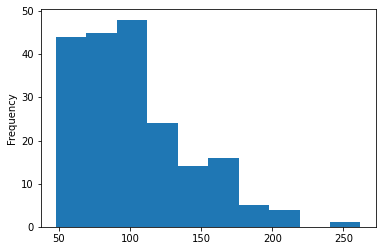

In [26]:
auto.horsepower.plot(kind = 'hist')

### 15.Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [27]:
bins = np.linspace(min(auto["horsepower"]), max(auto["horsepower"]), 4)

In [28]:
b_name = ['low', 'medium', 'high']

In [29]:
auto['horsepower-binned'] = pd.cut(auto['horsepower'], bins, labels=b_name, include_lowest=True )
auto['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

### 16.Plot distribution of “horsepower-binned”

(array([153.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

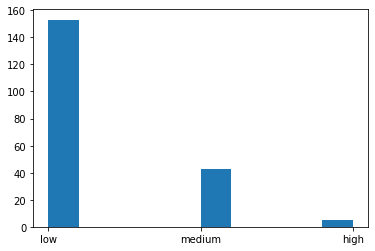

In [30]:
plt.hist(auto['horsepower-binned'])

### 17.Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”

In [31]:
FT_OHE = pd.get_dummies(auto['fuel-type'])
auto = auto.join(FT_OHE)
auto.drop("fuel-type", axis = 1, inplace=True)

In [32]:
ASP_OHE = pd.get_dummies(auto['aspiration'])
auto = auto.join(ASP_OHE)
auto.drop("aspiration", axis = 1, inplace=True)

## Exercise 2

### 1.Import the dataset: path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [2]:
df = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

### 2.Import matplotlib, seaborn, numpy and pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.See dimensions of data frame and its data types for each column


In [15]:
automobile = pd.read_csv(df)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
automobile.shape

(201, 29)

In [6]:
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

The dimensions of the dataset are (201,29) and data types for each column are given above.

### 4.Calculate correlation between engine-size and price using corr function


In [13]:
automobile[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### 5.Identify variables with positive or negative correlation with price


In [14]:
p1 = automobile.corr()
p1['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

Variables with positive correlation:normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower,city-L/100km, diesel

Variables with negative correlation: symboling, peak-rpm, city-mppg, highway-mpg, gas



### 6.Identify datatype of “peak-rpm”


In [8]:
automobile['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
196    5400.0
197    5300.0
198    5500.0
199    4800.0
200    5400.0
Name: peak-rpm, Length: 201, dtype: float64

The data type of "peak-rpm" is float64

### 7.Using seaborn regplot() - plot relation between “engine-size” and “price”. Comment on your observation.


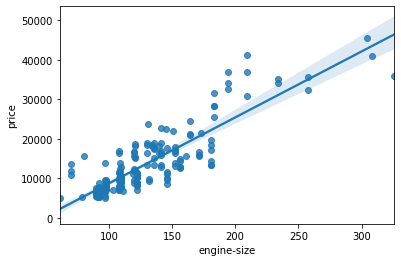

In [18]:
sns.regplot(x="engine-size", y="price", data=automobile)

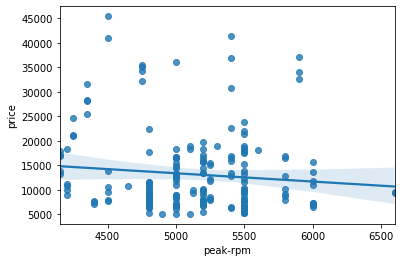

In [20]:
sns.regplot(x="peak-rpm", y="price", data=automobile)

### 8.Identify using regplot() - which other variables can affect “price” and which do not affect it.


In [31]:
sns.regplot(x= y="price", data=automobile)

TypeError: ignored

### 9.Use seaborn pairplot() to identify which variables can affect “price”


### 10.Draw a heatmap to plot the correlation in the dataframe


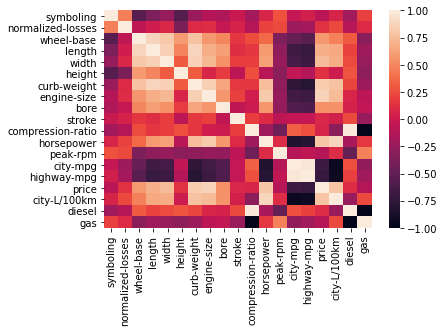

In [9]:
hm = automobile.corr()
sns.heatmap(hm)
plt.show()

### 11.With seaborn boxplot() - compare “body-style” with “price” 


### 12.Continue for other categorical variables in the dataset.


### 13.What do you infer from the boxplots about the relationship between the variables.


### 14.Use describe() to get descriptive statistics of numeric variables


### 15.Use describe() to get stats of categorical variables


### 16.Get unique values in each categorical variable along with their frequency. What do you understand by doing this?


### 17.Use groupby() to get the average price of “drive-wheels” wrt “price”. What do you understand by doing this?


### 18.Repeat step 17 for other categorical variables.


### 19.Use groupby() to find the average price for “drive-wheels”and”body-style” with price. Observation? Inference?


### 20.Use pivot() on the result of step 19 to get “drive-wheels” as index and “body-style” as columns. Observations? Inference?


### 21.Repeat step 19and20 for other combinations of independent variables wrt price. Observations? Inferences?


### 22.Draw heatmap for result of step20


### 23.Calculate the pearson correlation between “wheel-base” and “price”. What can you conclude from p-value (Hint: use stats from scipy which has pearsonr())


### 24.Perform one way ANOVA test using f_oneway() of stats to check if different groups of “drive-wheels” are correlated with “price”. What do you understand from F-test and p-value results?
